In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import math
from xgboost import XGBRegressor

from scipy.stats import zscore
 
import category_encoders as ce

import pingouin as pg

from sklearn.metrics import mean_squared_error

In [2]:
housing = pd.read_csv('Melbourne_housing_FULL.csv')
housing

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [3]:
housing.drop(['Address', 'Method', 'SellerG', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount', 'Postcode'], axis=1, inplace=True)

In [4]:
housing

,Suburb,Rooms,Type,Price,Date,Distance,Bedroom2,Bathroom,Car,Landsize
0,Abbotsford,2,h,NaN,3/09/2016,2.5,2.0,1.0,1.0,126.0
1,Abbotsford,2,h,1480000.0,3/12/2016,2.5,2.0,1.0,1.0,202.0
2,Abbotsford,2,h,1035000.0,4/02/2016,2.5,2.0,1.0,0.0,156.0
3,Abbotsford,3,u,NaN,4/02/2016,2.5,3.0,2.0,1.0,0.0
4,Abbotsford,3,h,1465000.0,4/03/2017,2.5,3.0,2.0,0.0,134.0
...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,4,h,1480000.0,24/02/2018,6.3,4.0,1.0,3.0,593.0
34853,Yarraville,2,h,888000.0,24/02/2018,6.3,2.0,2.0,1.0,98.0
34854,Yarraville,2,t,705000.0,24/02/2018,6.3,2.0,1.0,2.0,220.0
34855,Yarraville,3,h,1140000.0,24/02/2018,6.3,NaN,NaN,NaN,NaN


In [5]:
housing.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize
count,34857.000000,2.724700e+04,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000
mean,3.031012,1.050173e+06,11.184929,3.084647,1.624798,1.728845,593.598993
std,0.969933,6.414671e+05,6.788892,0.980690,0.724212,1.010771,3398.841946
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6.350000e+05,6.400000,2.000000,1.000000,1.000000,224.000000
50%,3.000000,8.700000e+05,10.300000,3.000000,2.000000,2.000000,521.000000
75%,4.000000,1.295000e+06,14.000000,4.000000,2.000000,2.000000,670.000000
max,16.000000,1.120000e+07,48.100000,30.000000,12.000000,26.000000,433014.000000


In [6]:
housing.isna().sum()/len(housing)*100

Suburb       0.000000
Rooms        0.000000
Type         0.000000
Price       21.832057
Date         0.000000
Distance     0.002869
Bedroom2    23.573457
Bathroom    23.599277
Car         25.039447
Landsize    33.881286
dtype: float64

In [7]:
housing['Price'].fillna(housing['Price'].median(), inplace=True)
housing['Distance'].fillna(housing['Distance'].median(), inplace=True)
housing['Bedroom2'].fillna(housing['Bedroom2'].value_counts().index[0], inplace=True)
housing['Bathroom'].fillna(housing['Bathroom'].value_counts().index[0], inplace=True)
housing['Car'].fillna(housing['Car'].value_counts().index[0], inplace=True)
housing['Landsize'].fillna(housing['Landsize'].median(), inplace=True)

In [8]:
housing['Date'] = pd.to_datetime(housing['Date'])
housing['month'] = housing['Date'].dt.month
housing

,Suburb,Rooms,Type,Price,Date,Distance,Bedroom2,Bathroom,Car,Landsize,month
0,Abbotsford,2,h,870000.0,2016-03-09,2.5,2.0,1.0,1.0,126.0,3
1,Abbotsford,2,h,1480000.0,2016-03-12,2.5,2.0,1.0,1.0,202.0,3
2,Abbotsford,2,h,1035000.0,2016-04-02,2.5,2.0,1.0,0.0,156.0,4
3,Abbotsford,3,u,870000.0,2016-04-02,2.5,3.0,2.0,1.0,0.0,4
4,Abbotsford,3,h,1465000.0,2017-04-03,2.5,3.0,2.0,0.0,134.0,4
...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,4,h,1480000.0,2018-02-24,6.3,4.0,1.0,3.0,593.0,2
34853,Yarraville,2,h,888000.0,2018-02-24,6.3,2.0,2.0,1.0,98.0,2
34854,Yarraville,2,t,705000.0,2018-02-24,6.3,2.0,1.0,2.0,220.0,2
34855,Yarraville,3,h,1140000.0,2018-02-24,6.3,3.0,1.0,2.0,521.0,2


We create new feature which is what season house is sold.

based on https://www.australia.com/en/facts-and-planning/weather-in-australia/melbourne-weather.html, Melbourne is divided into 4 seasons

-Summer (Dec - Feb)

-Autumn (March – May)

-Winter (June – August)

-Spring (September – November)

In [9]:
def season(x):
    summer = [12,1,2]
    autumn = [3,4,5]
    winter = [6,7,8]
    spring = [9,10,11]
    if x in summer:
        return 'summer'
    elif x in autumn:
        return 'autumn'
    elif x in winter:
        return 'winter'
    elif x in spring:
        return 'spring'

housing['season'] = housing['month'].apply(season)

In [10]:
def distance(y):
    if 0 < y <= 5:
        return 'very near'
    elif 5 < y <= 10:
        return 'near'
    elif 10 < y <= 15:
        return 'far'
    else:
        return 'very far'

housing['Distance'] = housing['Distance'].apply(distance)  

In [11]:
housing

,Suburb,Rooms,Type,Price,Date,Distance,Bedroom2,Bathroom,Car,Landsize,month,season
0,Abbotsford,2,h,870000.0,2016-03-09,very near,2.0,1.0,1.0,126.0,3,autumn
1,Abbotsford,2,h,1480000.0,2016-03-12,very near,2.0,1.0,1.0,202.0,3,autumn
2,Abbotsford,2,h,1035000.0,2016-04-02,very near,2.0,1.0,0.0,156.0,4,autumn
3,Abbotsford,3,u,870000.0,2016-04-02,very near,3.0,2.0,1.0,0.0,4,autumn
4,Abbotsford,3,h,1465000.0,2017-04-03,very near,3.0,2.0,0.0,134.0,4,autumn
...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,4,h,1480000.0,2018-02-24,near,4.0,1.0,3.0,593.0,2,summer
34853,Yarraville,2,h,888000.0,2018-02-24,near,2.0,2.0,1.0,98.0,2,summer
34854,Yarraville,2,t,705000.0,2018-02-24,near,2.0,1.0,2.0,220.0,2,summer
34855,Yarraville,3,h,1140000.0,2018-02-24,near,3.0,1.0,2.0,521.0,2,summer


In [12]:
housing.drop(['Date'], axis=1, inplace=True)

In [13]:
housing = pd.get_dummies(housing, columns=['Suburb', 'season', 'Distance'], drop_first=True)
housing

,Rooms,Type,Price,Bedroom2,Bathroom,Car,Landsize,month,Suburb_Aberfeldie,Suburb_Airport West,...,Suburb_Yarra Glen,Suburb_Yarraville,Suburb_croydon,Suburb_viewbank,season_spring,season_summer,season_winter,Distance_near,Distance_very far,Distance_very near
0,2,h,870000.0,2.0,1.0,1.0,126.0,3,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,h,1480000.0,2.0,1.0,1.0,202.0,3,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,h,1035000.0,2.0,1.0,0.0,156.0,4,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,u,870000.0,3.0,2.0,1.0,0.0,4,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,h,1465000.0,3.0,2.0,0.0,134.0,4,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,h,1480000.0,4.0,1.0,3.0,593.0,2,0,0,...,0,1,0,0,0,1,0,1,0,0
34853,2,h,888000.0,2.0,2.0,1.0,98.0,2,0,0,...,0,1,0,0,0,1,0,1,0,0
34854,2,t,705000.0,2.0,1.0,2.0,220.0,2,0,0,...,0,1,0,0,0,1,0,1,0,0
34855,3,h,1140000.0,3.0,1.0,2.0,521.0,2,0,0,...,0,1,0,0,0,1,0,1,0,0


In [14]:
v = housing[['Bathroom', 'Rooms', 'Type', 'Car']]
housing = housing[v.replace(v.stack().value_counts()).gt(10).all(1)]
housing

,Rooms,Type,Price,Bedroom2,Bathroom,Car,Landsize,month,Suburb_Aberfeldie,Suburb_Airport West,...,Suburb_Yarra Glen,Suburb_Yarraville,Suburb_croydon,Suburb_viewbank,season_spring,season_summer,season_winter,Distance_near,Distance_very far,Distance_very near
0,2,h,870000.0,2.0,1.0,1.0,126.0,3,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,h,1480000.0,2.0,1.0,1.0,202.0,3,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,h,1035000.0,2.0,1.0,0.0,156.0,4,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,u,870000.0,3.0,2.0,1.0,0.0,4,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,h,1465000.0,3.0,2.0,0.0,134.0,4,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,h,1480000.0,4.0,1.0,3.0,593.0,2,0,0,...,0,1,0,0,0,1,0,1,0,0
34853,2,h,888000.0,2.0,2.0,1.0,98.0,2,0,0,...,0,1,0,0,0,1,0,1,0,0
34854,2,t,705000.0,2.0,1.0,2.0,220.0,2,0,0,...,0,1,0,0,0,1,0,1,0,0
34855,3,h,1140000.0,3.0,1.0,2.0,521.0,2,0,0,...,0,1,0,0,0,1,0,1,0,0


### Split Training Test

In [15]:
X = housing.drop('Price', axis=1)
y = housing['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [16]:
X_train

,Rooms,Type,Bedroom2,Bathroom,Car,Landsize,month,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,...,Suburb_Yarra Glen,Suburb_Yarraville,Suburb_croydon,Suburb_viewbank,season_spring,season_summer,season_winter,Distance_near,Distance_very far,Distance_very near
28697,3,h,3.0,2.0,1.0,336.0,11,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3696,4,h,4.0,3.0,2.0,657.0,7,0,0,0,...,0,0,0,0,0,0,1,0,0,0
20664,3,u,3.0,1.0,2.0,521.0,9,0,0,0,...,0,0,0,0,1,0,0,0,0,1
24442,3,h,3.0,1.0,2.0,521.0,10,0,0,0,...,0,0,0,0,1,0,0,0,1,0
29253,2,u,3.0,1.0,2.0,521.0,6,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16858,2,u,2.0,1.0,1.0,2256.0,5,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6269,3,h,3.0,2.0,2.0,521.0,10,0,0,0,...,0,0,0,0,1,0,0,1,0,0
11290,3,h,4.0,1.0,3.0,639.0,8,0,0,0,...,0,0,0,0,0,0,1,0,0,0
860,5,h,5.0,3.0,2.0,600.0,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Modelling

In [17]:
lin = LinearRegression()
skf = StratifiedKFold(n_splits=5)
scaler = StandardScaler()


imputer_pipeline = Pipeline([
    ('impute_num', SimpleImputer(strategy='most_frequent'))
])

onehot_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first'))
])

scaler_pipeline = Pipeline([
    ('scaler', scaler)
])

transformer = ColumnTransformer([
    ('imputer', imputer_pipeline, ['Bedroom2', 'Bathroom', 'Car']),
    ('scaler', scaler_pipeline, ['Landsize']),
    ('one_hot', onehot_pipeline, ['Type', 'Rooms', 'Bathroom', 'Car', 'month'])
    
])
default_pipeline_lin = Pipeline([
    ('transformer', transformer),
    ('clf', lin)
])

In [18]:
default_pipeline_lin.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('imputer',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Bedroom2', 'Bathroom',
                                                   'Car']),
                                                 ('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Landsize']),
                                                 ('one_hot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['T

In [19]:
y_pred = default_pipeline_lin.predict(X_test)
y_pred

array([1240851.95465788, 1017380.74133413,  894984.65986009, ...,
       1187895.03348269, 1145210.79957894, 1248968.84895886])

In [20]:
mse = mean_squared_error(y_test, y_pred)
rsme = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('Median House price is',housing['Price'].median())
print('RMSE from our model is', round(rsme,2))
print('R2 from our model is', r2)

Median House price is 870000.0
RMSE from our model is 510181.4
R2 from our model is 0.19571909469037274


### With yearbuilt, buildingarea feature and drop missing values

In [21]:
housing_2 = pd.read_csv('Melbourne_housing_FULL.csv')
housing_2

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [22]:
housing_2 = housing_2.dropna()
housing_2

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.80240,144.99930,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,Wollert,27 Birchmore Rd,3,h,500000.0,PI,Ray,24/02/2018,25.5,3750.0,...,2.0,2.0,383.0,118.0,2016.0,Whittlesea City Council,-37.61940,145.03951,Northern Metropolitan,2940.0
34849,Wollert,35 Kingscote Wy,3,h,570000.0,SP,RW,24/02/2018,25.5,3750.0,...,2.0,2.0,404.0,158.0,2012.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


In [23]:
housing_2.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [24]:
housing_2['age'] = 2020 - housing_2['YearBuilt']

<ipython-input-24-de234e748b48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_2['age'] = 2020 - housing_2['YearBuilt']


In [25]:
housing_2 = housing_2.drop(['Address', 'SellerG', 'Postcode', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount', 'Bedroom2'], axis=1)

In [26]:
housing_2

,Suburb,Rooms,Type,Price,Method,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,age
2,Abbotsford,2,h,1035000.0,S,4/02/2016,2.5,1.0,0.0,156.0,79.0,1900.0,120.0
4,Abbotsford,3,h,1465000.0,SP,4/03/2017,2.5,2.0,0.0,134.0,150.0,1900.0,120.0
6,Abbotsford,4,h,1600000.0,VB,4/06/2016,2.5,1.0,2.0,120.0,142.0,2014.0,6.0
11,Abbotsford,3,h,1876000.0,S,7/05/2016,2.5,2.0,0.0,245.0,210.0,1910.0,110.0
14,Abbotsford,2,h,1636000.0,S,8/10/2016,2.5,1.0,2.0,256.0,107.0,1890.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,Wollert,3,h,500000.0,PI,24/02/2018,25.5,2.0,2.0,383.0,118.0,2016.0,4.0
34849,Wollert,3,h,570000.0,SP,24/02/2018,25.5,2.0,2.0,404.0,158.0,2012.0,8.0
34853,Yarraville,2,h,888000.0,SP,24/02/2018,6.3,2.0,1.0,98.0,104.0,2018.0,2.0
34854,Yarraville,2,t,705000.0,S,24/02/2018,6.3,1.0,2.0,220.0,120.0,2000.0,20.0


In [27]:
housing_2['Date'] = pd.to_datetime(housing_2['Date'])
housing_2['month'] = housing_2['Date'].dt.month
housing_2['season'] = housing_2['month'].apply(season)
housing_2['Distance'] = housing_2['Distance'].apply(distance)  

In [28]:
housing_2

,Suburb,Rooms,Type,Price,Method,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,age,month,season
2,Abbotsford,2,h,1035000.0,S,2016-04-02,very near,1.0,0.0,156.0,79.0,1900.0,120.0,4,autumn
4,Abbotsford,3,h,1465000.0,SP,2017-04-03,very near,2.0,0.0,134.0,150.0,1900.0,120.0,4,autumn
6,Abbotsford,4,h,1600000.0,VB,2016-04-06,very near,1.0,2.0,120.0,142.0,2014.0,6.0,4,autumn
11,Abbotsford,3,h,1876000.0,S,2016-07-05,very near,2.0,0.0,245.0,210.0,1910.0,110.0,7,winter
14,Abbotsford,2,h,1636000.0,S,2016-08-10,very near,1.0,2.0,256.0,107.0,1890.0,130.0,8,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,Wollert,3,h,500000.0,PI,2018-02-24,very far,2.0,2.0,383.0,118.0,2016.0,4.0,2,summer
34849,Wollert,3,h,570000.0,SP,2018-02-24,very far,2.0,2.0,404.0,158.0,2012.0,8.0,2,summer
34853,Yarraville,2,h,888000.0,SP,2018-02-24,near,2.0,1.0,98.0,104.0,2018.0,2.0,2,summer
34854,Yarraville,2,t,705000.0,S,2018-02-24,near,1.0,2.0,220.0,120.0,2000.0,20.0,2,summer


In [29]:
housing_2.drop(['Method', 'Date'],axis=1, inplace=True)

In [30]:
housing_2['Distance'].value_counts()

near         3112
far          2842
very far     1688
very near    1245
Name: Distance, dtype: int64

In [31]:
r = housing_2[['Bathroom', 'Rooms', 'Type', 'Car', 'Suburb']]
housing_2 = housing_2[r.replace(r.stack().value_counts()).gt(10).all(1)]

### Train test split

In [32]:
X2 = housing_2.drop('Price', axis=1)
y2 = housing_2['Price']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=.2, random_state=0)

In [33]:
X2_train

,Suburb,Rooms,Type,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,age,month,season
32069,Reservoir,3,h,far,1.0,2.0,609.0,86.0,1950.0,70.0,3,autumn
8943,Richmond,3,h,very near,1.0,1.0,331.0,121.0,1960.0,60.0,7,winter
2474,Bulleen,4,h,far,2.0,2.0,475.0,245.0,1996.0,24.0,10,spring
18492,Donvale,3,h,very far,1.0,2.0,720.0,116.0,1960.0,60.0,7,winter
33815,Taylors Hill,3,h,very far,2.0,2.0,621.0,654.0,1998.0,22.0,3,autumn
...,...,...,...,...,...,...,...,...,...,...,...,...
13768,Sunshine North,4,h,far,1.0,2.0,665.0,147.0,1980.0,40.0,4,autumn
32726,Mernda,4,h,very far,2.0,2.0,480.0,191.0,2015.0,5.0,2,summer
15696,Hawthorn,4,h,near,2.0,4.0,1690.0,284.0,1863.0,157.0,6,winter
9911,Sunshine North,3,h,far,3.0,2.0,221.0,155.0,2011.0,9.0,7,winter


In [34]:
lin_2 = LinearRegression()
skf = StratifiedKFold(n_splits=5)
scaler = StandardScaler()

onehot_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first'))
])

ordinal_pipeline = Pipeline([
    ('onehot', OrdinalEncoder())
])

scaler_pipeline = Pipeline([
    ('scaler', scaler)
])

transformer_2 = ColumnTransformer([
    ('scaler', scaler_pipeline, ['Landsize', 'BuildingArea', 'age']),
    ('one_hot', onehot_pipeline, ['Type', 'Suburb', 'season']),
    ('ordinal', ordinal_pipeline, ['Distance'])
    
])
new_pipeline_lin = Pipeline([
    ('transformer', transformer_2),
    ('clf', lin_2)
])

In [35]:
new_pipeline_lin.fit(X2_train, y2_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Landsize', 'BuildingArea',
                                                   'age']),
                                                 ('one_hot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Type', 'Suburb', 'season']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['Distance

In [36]:
y_pred_new = new_pipeline_lin.predict(X2_test)
y_pred_new

array([1482042.25366131,  754467.75782941,  436034.23005645, ...,
        277153.43509858,  495799.44579689, 1078214.67391086])

In [37]:
mse_2 = mean_squared_error(y2_test, y_pred_new)
rsme_2 = math.sqrt(mse_2)
r2_new = r2_score(y2_test, y_pred_new)
print('Median House price is',housing_2['Price'].median())
print('RMSE from our model is', round(rsme_2,2))
print('R2 from our model is', r2_new)

Median House price is 908500.0
RMSE from our model is 417255.65
R2 from our model is 0.6037029626947308


### Check train score

In [38]:
y_pred_train = new_pipeline_lin.predict(X2_train)
mse_train = mean_squared_error(y2_train, y_pred_train)
rsme_train = math.sqrt(mse_train)
r2_train = r2_score(y2_train, y_pred_train)
print('Median House price is',housing_2['Price'].median())
print('RMSE from our model is', round(rsme_train,2))
print('R2 from our model is', r2_train)

Median House price is 908500.0
RMSE from our model is 397204.47
R2 from our model is 0.67613747711913


### Residual Analysis

<Figure size 1080x360 with 0 Axes>

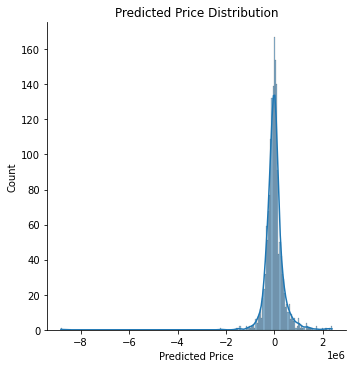

In [39]:
plt.figure(figsize=(15,5))
sns.displot((y2_test - y_pred_new), kde=True)
plt.title('Predicted Price Distribution')
plt.xlabel('Predicted Price')
plt.show()

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

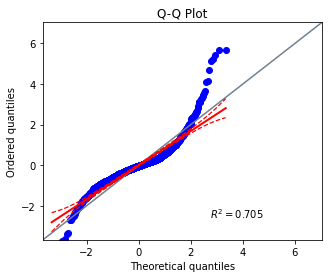

In [40]:
pg.qqplot((y2_test - y_pred_new), dist='norm')

In [41]:
(y2_test - y_pred_new).skew()

-4.884778688829066

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


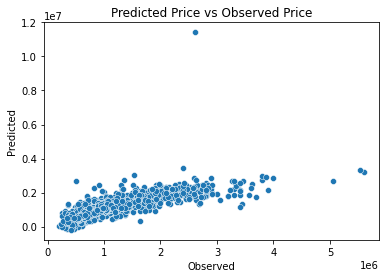

In [42]:
sns.scatterplot(y2_test, y_pred_new)
plt.title('Predicted Price vs Observed Price')
plt.ylabel('Predicted')
plt.xlabel('Observed')
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


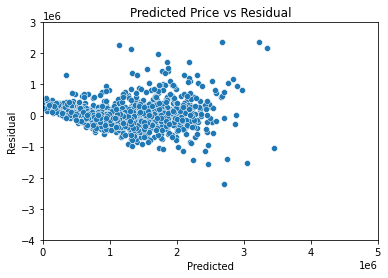

In [43]:
sns.scatterplot(y_pred_new, (y2_test - y_pred_new))
plt.title('Predicted Price vs Residual')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.xlim(0,5000000)
plt.ylim(-4000000,3000000)
plt.show()


As we can see from the distribution of residual and relationship between predicted vs residual price does not meet any of gauss-markov assumption so we can say the linear model is not applicable for our data

Assumption Assesment:
1. If we refer to the histogram, the residual looks left skewed
1. Model residuals gather around zero at first but get bigger as predicted value goes up 
1. heteroscedasticity occur

In [44]:
housing

,Rooms,Type,Price,Bedroom2,Bathroom,Car,Landsize,month,Suburb_Aberfeldie,Suburb_Airport West,...,Suburb_Yarra Glen,Suburb_Yarraville,Suburb_croydon,Suburb_viewbank,season_spring,season_summer,season_winter,Distance_near,Distance_very far,Distance_very near
0,2,h,870000.0,2.0,1.0,1.0,126.0,3,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,h,1480000.0,2.0,1.0,1.0,202.0,3,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,h,1035000.0,2.0,1.0,0.0,156.0,4,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,u,870000.0,3.0,2.0,1.0,0.0,4,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,h,1465000.0,3.0,2.0,0.0,134.0,4,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,h,1480000.0,4.0,1.0,3.0,593.0,2,0,0,...,0,1,0,0,0,1,0,1,0,0
34853,2,h,888000.0,2.0,2.0,1.0,98.0,2,0,0,...,0,1,0,0,0,1,0,1,0,0
34854,2,t,705000.0,2.0,1.0,2.0,220.0,2,0,0,...,0,1,0,0,0,1,0,1,0,0
34855,3,h,1140000.0,3.0,1.0,2.0,521.0,2,0,0,...,0,1,0,0,0,1,0,1,0,0
